# Vector representation

**Geometric form**<br>
v = (3, 4)<br><br>
Ordered pair (a,b) that represents direction and magnitude.   

**Component form**<br>
v = 3i + 4j<br><br>
Component form can represent the vector v as a linear combination of the basis vectors i and j, which are the unit vectors pointing in available positive directions, in 2D, usually horizontal (x-axis) and vertical (y-axis).

**Polar form**<br>
v = (5, $\theta$), where $\theta$ = arctan(4/3)<br><br>
Represented by the pair (r, $\theta$), where r is the magnitude (or norm) and $\theta$ is the angle between the vector and the positive x-axis.

**Homogenous coordinates**<br>
v = (3, 4, 1)<br><br>
This form represents the vector as a three-element tuple (x, y, w), where w is a scaling factor.

**Matrix form**<br>
v = $\begin{bmatrix}3\\4\end{bmatrix}$<br><br>

Column or row matrix, used to perform linear transformations such as rotations and translations of multiple vectors simultaneously. 

**Parametric form**<br>
v = (3t, 4t), where t is a scalar paramterer<br><br>
A vector represented as a linear combination of two or more parameterized vectors, used to describe curves and surfaces in space using a finite number of equations.


**Normalized form**<br>
    $\hat v$ = (3/5, 4/5)<br><br>
Unit vector, which has a magnitude of 1. Only represents the direction.

**Projection form**<br>
v projected onto x-axis = (3,0)<br>
v projected onto y-axis = (0,4)<br><br>
The projection of one vector onto another vector, used to find the component of one vector along another vector.

**Function form**<br>
v(t) = 3t(i) + 4t(j)<br>   
Where i and j are the unit vectors in the x-and y-directions and t is a scalar parameter that varies over a range of values, typically representing time. The value of t can be used to parameterize a curve or path in space.

**Dual form**<br>
w = (a, b) mapped to the scalar 3a + 4b<br>




Plotting the same vector represented in different forms

v_component=array([3, 4])
v_polar=(5, 53.13010235415598)


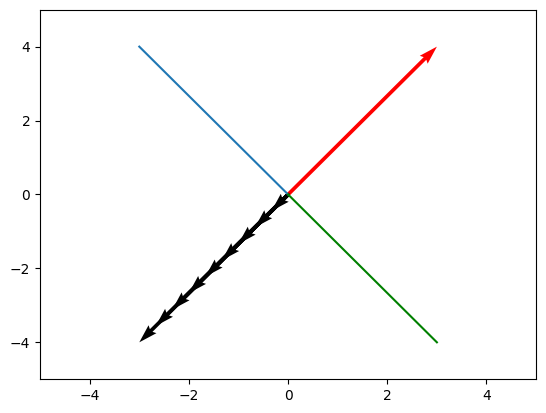

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# geometric (red arrow on plot)
v_geo = np.array([3, 4])
plt.quiver(0, 0, v_geo[0], v_geo[1], angles='xy', scale_units='xy', scale=1, color='red')
# offset by 1 unit on x axis for visual representation

# function (multiple black arrows on plot)
def v_func(t):
    return np.array([-3*t, -4*t]) # negative x and negative y for plotting
t = np.linspace(0, 1, 10)
plt.quiver(*np.zeros_like(v_func(t)), *v_func(t), angles='xy', scale_units='xy', scale=1)

# parametric form (blue line on plot)
v_para = np.array([-3, 4]) # negative x-axis for plotting
t = np.linspace(0, 1, 10)
plt.plot(v_para[0]*t, v_para[1]*t)

# matrix form (green line on plot)
v_matrix = np.array([[3], [-4]])
origin = np.zeros((2,1))
v_matrix_values = np.hstack((origin, v_matrix))
plt.plot(*v_matrix_values, color='green')

# component
v_component = np.array([3, 4])
print(f"{v_component=}")

# polar
v_polar = (5, np.arctan2(v_geo[1], v_geo[0]) * 180 / np.pi)
print(f"{v_polar=}")

plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

### 3D vector

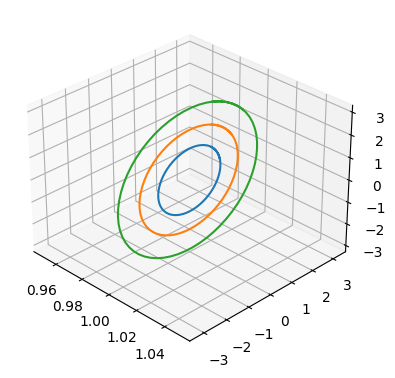

In [4]:
# Vector rotation (From daily doodle 33)
# Plots the rotation of coordinates in 3D space

def plot_3d_rotation(degrees=90, steps=4):

    theta = np.pi/(180/degrees) # 90 degrees

    rotate_x = np.array([[1, 0, 0],
                         [0, np.cos(theta), -np.sin(theta)],
                         [0, np.sin(theta), np.cos(theta)]])
    rotate_y = np.array([[np.cos(theta), 0, np.sin(theta)],
                         [0, 1, 0],
                         [-np.sin(theta), 0, np.cos(theta)]])
    rotate_z = np.array([[np.cos(theta), -np.sin(theta), 0],
                         [np.sin(theta), np.cos(theta), 0],
                         [0, 0, 1]])

    # TODO: make this args instead:
    v_x = np.array([1, 1, 1])
    v_y = np.array([1, 1, 2])
    v_z = np.array([1, 1, 3])

    # Apply the rotation matrices and store the results in a list
    points1 = [v_x]
    points2 = [v_y]
    points3 = [v_z]

    # Same rotation, rotation matrix could also be args
    for i in range(steps):
        v_x = np.dot(v_x, rotate_x)
        points1.append(v_x)
    
        v_y = np.dot(v_y, rotate_x)
        points2.append(v_y)
    
        v_z = np.dot(v_z, rotate_x)
        points3.append(v_z)

    # Convert the list of points to numpy array for plotting
    points = np.array(points1)
    points2 = np.array(points2)
    points3 = np.array(points3)
    
    fig = plt.figure(figsize=(10, 10))
    
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax1.plot(points[:,0], points[:,1], points[:,2])
    ax1.plot(points2[:,0], points2[:,1], points2[:,2])
    ax1.plot(points3[:,0], points3[:,1], points3[:,2])
    
    # Perspective rotation:
    ax1.view_init(elev=30, azim=-45, roll=0)
    
    plt.show()

plot_3d_rotation(degrees=6.125, steps=64)

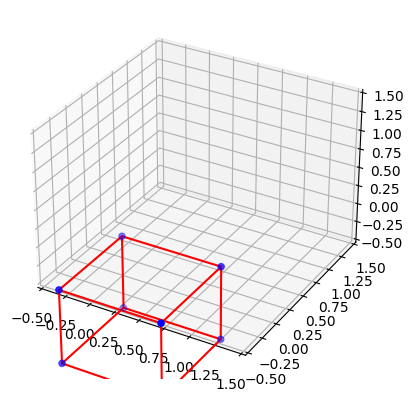

In [10]:
# Now we use theta as argument to set rotation

def plot_cube(vertices, theta_x=0):
    # define the 12 edges of the cube by specifying the pairs of vertices that make up each edge
    edges = [(0,1), (1,2), (2,3), (3,0), (4,5), (5,6), (6,7), (7,4), (0,4), (1,5), (2,6), (3,7)]

    # create a 3D figure and set the projection to '3d'
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # rotate the vertices around the x-axis by theta_x
    rotate_x = np.array([[1, 0, 0],
                         [0, np.cos(theta_x), -np.sin(theta_x)],
                         [0, np.sin(theta_x), np.cos(theta_x)]])
    vertices = vertices @ rotate_x #matmul

    # plot the vertices as blue dots
    ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c='blue', marker='o')

    # plot the edges as lines connecting the vertices
    for edge in edges:
        start = vertices[edge[0]]
        end = vertices[edge[1]]
        ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], c='red')

    ax.set_xlim([-.5,1.5])
    ax.set_ylim([-.5,1.5])
    ax.set_zlim([-.5,1.5])

    plt.show()

vertices = np.array([[0,0,0], [1,0,0], [1,1,0], [0,1,0], [0,0,1], [1,0,1], [1,1,1], [0,1,1]])
plot_cube(vertices, np.pi)


Now that's outside the box.